In [1]:
# Let's import the aln model
from neurolib.models.aln import ALNModel

# Create the model
aln = ALNModel()

# Each model comes with a set of default parameters which are are a dictionary. 
# Let's change the parameter that controls the duration of a simulation to 10s.
aln.params['duration'] = 10.0 * 1000  


In [2]:
# For convenience, we could also use:
aln.params.duration = 10.0 * 1000

# In the aln model an Ornstein-Uhlenbeck process is simulated in parallel
# as the source of input noise fluctuations. Here we can set the variance
# of the process. 
# For more info: https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process 
# Let's add some noise.
aln.params['sigma_ou'] = 0.1

# Finally, we run the model
aln.run()

In [3]:
aln.outputs.keys()

dict_keys(['t', 'rates_exc', 'rates_inh', 'IA'])

In [4]:
aln['t']

array([1.0000e-01, 2.0000e-01, 3.0000e-01, ..., 9.9998e+03, 9.9999e+03,
       1.0000e+04])

In [5]:
aln.rates_exc.shape

(1, 100000)

In [6]:
aln.output

array([[19.0393852 , 17.4801176 , 16.08443066, ...,  1.74945405,
         1.74330366,  1.73717905]])

In [13]:
aln.t.shape

(100000,)

In [8]:
xr = aln.xr()
print(xr.dims)

('output', 'space', 'time')


In [14]:
import matplotlib.pyplot as plt
import numpy as np

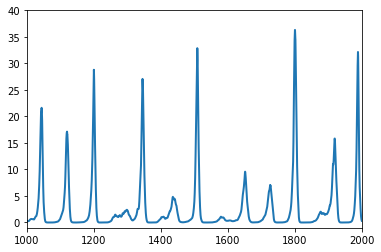

In [38]:
y=np.transpose(aln.output)
x=aln.t

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(1000,2000),ylim=(-1,40))
plt.show()


In [39]:
xr = aln.xr()
print(xr.dims)

('output', 'space', 'time')


In [40]:
aln.params["mue_ext_mean"]

0.4

In [41]:
# initialize the model
aln = ALNModel()
aln.params['duration'] = 2.0*1000

# lists that will conatin the results
max_outputs = []
min_outputs = []
# these are the different input values that we want to scan
inputs = np.linspace(0, 2, 50)

# cycle through all input values
for mue in inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    aln.params['mue_ext_mean'] = mue
    aln.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_outputs.append(np.max(aln.output[0, -int(1000/aln.params['dt']):]))
    min_outputs.append(np.min(aln.output[0, -int(1000/aln.params['dt']):]))

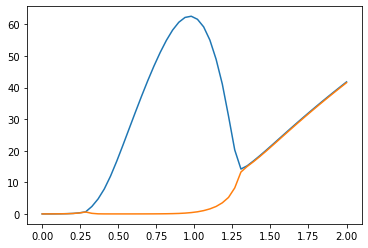

In [43]:
plt.plot(inputs,max_outputs)
plt.plot(inputs,min_outputs)

In [44]:
from neurolib.utils.loadData import Dataset
ds = Dataset("hcp")

In [45]:
ds.Cmat.shape

(80, 80)

In [46]:
# We load the model, but now with the structural dataset
aln = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

# Let's run the simulation for a few minutes
aln.params['duration'] = 3*60*1000 

In [47]:
aln.params['mue_ext_mean'] = 1.57
aln.params['mui_ext_mean'] = 1.6
# We set an appropriate level of noise
aln.params['sigma_ou'] = 0.09
# And turn on adaptation with a low value of spike-triggered adaptation currents.
aln.params['b'] = 5.0

In [48]:
aln.params['Cmat']

array([[0.        , 0.07906338, 0.20767269, ..., 0.00061314, 0.0362114 ,
        0.00127439],
       [0.07906338, 0.        , 0.02107246, ..., 0.00191405, 0.00083845,
        0.0205666 ],
       [0.20767269, 0.02107246, 0.        , ..., 0.00106483, 0.01315564,
        0.00241511],
       ...,
       [0.00061314, 0.00191405, 0.00106483, ..., 0.        , 0.00192148,
        0.16260376],
       [0.0362114 , 0.00083845, 0.01315564, ..., 0.00192148, 0.        ,
        0.00413606],
       [0.00127439, 0.0205666 , 0.00241511, ..., 0.16260376, 0.00413606,
        0.        ]])

<AxesSubplot:>

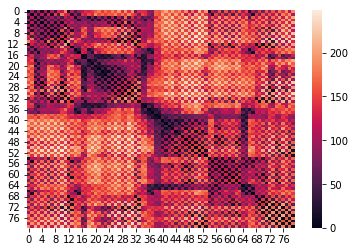

In [55]:
import seaborn as sns

sns.heatmap(aln.params['Cmat'])
sns.heatmap(aln.params['lengthMat'])

In [59]:
aln.run(chunkwise=True, chunksize = 100000, bold=True)

In [60]:
aln.outputs.keys()

dict_keys(['t', 'rates_exc', 'rates_inh', 'IA', 'BOLD'])

In [ ]:
scores = [func.matrix_correlation(func.fc(aln.BOLD.BOLD[:, 5:]), fcemp) for fcemp in ds.FCs]

print("Correlation per subject:", [f"{s:.2}" for s in scores])
print(f"Mean FC/FC correlation: {np.mean(scores):.2}")